In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 197

In [2]:
#pd.__version__
#pip uninstall pandas

This script analyse this association rules find in the first version

In [3]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv1.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit1_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'SAP Adaptive Server'}),frozenset({'SAP SQL Anywhere'}),0.046154,0.046154,0.046154,1.000000,21.666667,0.044024,inf,1,1
1,frozenset({'SAP SQL Anywhere'}),frozenset({'SAP Adaptive Server'}),0.046154,0.046154,0.046154,1.000000,21.666667,0.044024,inf,1,1
2,frozenset({'IBM DB2'}),frozenset({'Informix'}),0.056410,0.030769,0.025641,0.454545,14.772727,0.023905,1.776923,1,1
3,frozenset({'Informix'}),frozenset({'IBM DB2'}),0.030769,0.056410,0.025641,0.833333,14.772727,0.023905,5.661538,1,1
4,frozenset({'IBM DB2'}),frozenset({'SAP Adaptive Server'}),0.056410,0.046154,0.030769,0.545455,11.818182,0.028166,2.098462,1,1
...,...,...,...,...,...,...,...,...,...,...,...
109,frozenset({'MySQL_Maria DB'}),frozenset({'SQLite'}),0.333333,0.087179,0.061538,0.184615,2.117647,0.032479,1.119497,1,1
110,frozenset({'MySQL_Maria DB'}),frozenset({'HyperSQL'}),0.333333,0.138462,0.092308,0.276923,2.000000,0.046154,1.191489,1,1
111,frozenset({'HyperSQL'}),frozenset({'MySQL_Maria DB'}),0.138462,0.333333,0.092308,0.666667,2.000000,0.046154,2.000000,1,1
112,frozenset({'MySQL_Maria DB'}),frozenset({'Redis'}),0.333333,0.066667,0.030769,0.092308,1.384615,0.008547,1.028249,1,1


In [4]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [5]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,0.046154,0.046154,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,0.046154,0.046154,1.000000,21.666667,0.044024,inf,1,1
2,IBM DB2,Informix,0.056410,0.030769,0.025641,0.454545,14.772727,0.023905,1.776923,1,1
3,Informix,IBM DB2,0.030769,0.056410,0.025641,0.833333,14.772727,0.023905,5.661538,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,0.046154,0.030769,0.545455,11.818182,0.028166,2.098462,1,1
...,...,...,...,...,...,...,...,...,...,...,...
109,MySQL_Maria DB,SQLite,0.333333,0.087179,0.061538,0.184615,2.117647,0.032479,1.119497,1,1
110,MySQL_Maria DB,HyperSQL,0.333333,0.138462,0.092308,0.276923,2.000000,0.046154,1.191489,1,1
111,HyperSQL,MySQL_Maria DB,0.138462,0.333333,0.092308,0.666667,2.000000,0.046154,2.000000,1,1
112,MySQL_Maria DB,Redis,0.333333,0.066667,0.030769,0.092308,1.384615,0.008547,1.028249,1,1


In [6]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
2,IBM DB2,Informix,0.056410,11.112821,0.030769,6.061538,0.025641,5.051282,0.454545,14.772727,0.023905,1.776923,1,1
3,Informix,IBM DB2,0.030769,6.061538,0.056410,11.112821,0.025641,5.051282,0.833333,14.772727,0.023905,5.661538,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,MySQL_Maria DB,SQLite,0.333333,65.666667,0.087179,17.174359,0.061538,12.123077,0.184615,2.117647,0.032479,1.119497,1,1
110,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18.184615,0.276923,2.000000,0.046154,1.191489,1,1
111,HyperSQL,MySQL_Maria DB,0.138462,27.276923,0.333333,65.666667,0.092308,18.184615,0.666667,2.000000,0.046154,2.000000,1,1
112,MySQL_Maria DB,Redis,0.333333,65.666667,0.066667,13.133333,0.030769,6.061538,0.092308,1.384615,0.008547,1.028249,1,1


In [7]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
2,IBM DB2,Informix,0.056410,11.112821,0.030769,6.061538,0.025641,5.051282,0.454545,14.772727,0.023905,1.776923,1,1
3,Informix,IBM DB2,0.030769,6.061538,0.056410,11.112821,0.025641,5.051282,0.833333,14.772727,0.023905,5.661538,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,MySQL_Maria DB,SQLite,0.333333,65.666667,0.087179,17.174359,0.061538,12.123077,0.184615,2.117647,0.032479,1.119497,1,1
110,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18.184615,0.276923,2.000000,0.046154,1.191489,1,1
111,HyperSQL,MySQL_Maria DB,0.138462,27.276923,0.333333,65.666667,0.092308,18.184615,0.666667,2.000000,0.046154,2.000000,1,1
112,MySQL_Maria DB,Redis,0.333333,65.666667,0.066667,13.133333,0.030769,6.061538,0.092308,1.384615,0.008547,1.028249,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [8]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
100,MySQL_Maria DB,PostgreSQL_ CockroachDB,0.333333,65.666667,0.194872,38.389744,0.164103,32.328205,0.492308,2.526316,0.099145,1.585859,1,1
101,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32.328205,0.842105,2.526316,0.099145,4.222222,1,1
94,MySQL_Maria DB,Oracle,0.333333,65.666667,0.143590,28.287179,0.133333,26.266667,0.400000,2.785714,0.085470,1.427350,1,1
95,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26.266667,0.928571,2.785714,0.085470,9.333333,1,1
108,MySQL_Maria DB,H2,0.333333,65.666667,0.174359,34.348718,0.123077,24.246154,0.369231,2.117647,0.064957,1.308943,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,SQLite,MS SQL Server_Microsoft Azure SQL Database,0.087179,17.174359,0.051282,10.102564,0.025641,5.051282,0.294118,5.735294,0.021170,1.344017,1,1
29,MS SQL Server_Microsoft Azure SQL Database,SQLite,0.051282,10.102564,0.087179,17.174359,0.025641,5.051282,0.500000,5.735294,0.021170,1.825641,1,1
61,HyperSQL,MS SQL Server_Microsoft Azure SQL Database,0.138462,27.276923,0.051282,10.102564,0.025641,5.051282,0.185185,3.611111,0.018540,1.164336,1,1
32,SQLite,IBM DB2,0.087179,17.174359,0.056410,11.112821,0.025641,5.051282,0.294118,5.213904,0.020723,1.336752,1,1


In [9]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL_Maria DB,0.333333,65.666667,0.082418,16.236264,0.066667,13.133333,0.200000,2.543840,0.039194,1.171022,1.0,1.0
PostgreSQL_ CockroachDB,0.194872,38.389744,0.099573,19.615812,0.064103,12.628205,0.328947,3.759104,0.044699,1.581326,1.0,1.0
H2,0.174359,34.348718,0.101282,19.952564,0.053419,10.523504,0.306373,3.648912,0.035759,1.382241,1.0,1.0
Oracle,0.143590,28.287179,0.108159,21.307226,0.061072,12.031235,0.425325,4.908983,0.045542,2.350257,1.0,1.0
HyperSQL,0.138462,27.276923,0.116410,22.932821,0.050769,10.001538,0.366667,4.054698,0.034651,1.475200,1.0,1.0
SQLite,0.087179,17.174359,0.140385,27.655769,0.039744,7.829487,0.455882,4.408639,0.027505,1.670404,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [10]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.082418,16.236264,0.333333,65.666667,0.066667,13.133333,0.847947,2.543840,0.039194,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.099573,19.615812,0.194872,38.389744,0.064103,12.628205,0.732543,3.759104,0.044699,NaN,1.0,1.0
H2,0.101282,19.952564,0.174359,34.348718,0.053419,10.523504,0.636221,3.648912,0.035759,NaN,1.0,1.0
Oracle,0.108159,21.307226,0.143590,28.287179,0.061072,12.031235,0.704880,4.908983,0.045542,NaN,1.0,1.0
HyperSQL,0.116410,22.932821,0.138462,27.276923,0.050769,10.001538,0.561420,4.054698,0.034651,NaN,1.0,1.0


In [11]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.03)] 
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32.328205,0.842105,2.526316,0.099145,4.222222,1.0,1.0
MySQL_Maria DB,PostgreSQL_ CockroachDB,0.333333,65.666667,0.194872,38.389744,0.164103,32.328205,0.492308,2.526316,0.099145,1.585859,1.0,1.0
Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26.266667,0.928571,2.785714,0.085470,9.333333,1.0,1.0
MySQL_Maria DB,Oracle,0.333333,65.666667,0.143590,28.287179,0.133333,26.266667,0.400000,2.785714,0.085470,1.427350,1.0,1.0
H2,MySQL_Maria DB,0.174359,34.348718,0.333333,65.666667,0.123077,24.246154,0.705882,2.117647,0.064957,2.266667,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PostgreSQL_ CockroachDB,MS Access,0.194872,38.389744,0.030769,6.061538,0.025641,5.051282,0.131579,4.276316,0.019645,1.116084,1.0,1.0
HyperSQL,MS SQL Server_Microsoft Azure SQL Database,0.138462,27.276923,0.051282,10.102564,0.025641,5.051282,0.185185,3.611111,0.018540,1.164336,1.0,1.0
H2,MongoDB,0.174359,34.348718,0.056410,11.112821,0.025641,5.051282,0.147059,2.606952,0.015805,1.106278,1.0,1.0


In [12]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv1.xlsx', index=False)

In [13]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32.328205,0.842105,2.526316,0.099145,4.222222,1.0,1.0
Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26.266667,0.928571,2.785714,0.085470,9.333333,1.0,1.0
H2,MySQL_Maria DB,0.174359,34.348718,0.333333,65.666667,0.123077,24.246154,0.705882,2.117647,0.064957,2.266667,1.0,1.0
PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22.225641,0.578947,4.031955,0.084839,2.033974,1.0,1.0
H2,PostgreSQL_ CockroachDB,0.174359,34.348718,0.194872,38.389744,0.102564,20.205128,0.588235,3.018576,0.068586,1.955311,1.0,1.0
MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18.184615,0.276923,2.000000,0.046154,1.191489,1.0,1.0
HyperSQL,PostgreSQL_ CockroachDB,0.138462,27.276923,0.194872,38.389744,0.082051,16.164103,0.592593,3.040936,0.055069,1.976224,1.0,1.0
H2,Oracle,0.174359,34.348718,0.143590,28.287179,0.076923,15.153846,0.441176,3.072479,0.051887,1.532524,1.0,1.0
Oracle,HyperSQL,0.143590,28.287179,0.138462,27.276923,0.071795,14.143590,0.500000,3.611111,0.051913,1.723077,1.0,1.0


In [14]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32.328205,0.842105,2.526316,0.099145,4.222222,1.0,1.0
1,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26.266667,0.928571,2.785714,0.085470,9.333333,1.0,1.0
2,H2,MySQL_Maria DB,0.174359,34.348718,0.333333,65.666667,0.123077,24.246154,0.705882,2.117647,0.064957,2.266667,1.0,1.0
3,PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22.225641,0.578947,4.031955,0.084839,2.033974,1.0,1.0
4,H2,PostgreSQL_ CockroachDB,0.174359,34.348718,0.194872,38.389744,0.102564,20.205128,0.588235,3.018576,0.068586,1.955311,1.0,1.0
5,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18.184615,0.276923,2.000000,0.046154,1.191489,1.0,1.0
6,HyperSQL,PostgreSQL_ CockroachDB,0.138462,27.276923,0.194872,38.389744,0.082051,16.164103,0.592593,3.040936,0.055069,1.976224,1.0,1.0
7,H2,Oracle,0.174359,34.348718,0.143590,28.287179,0.076923,15.153846,0.441176,3.072479,0.051887,1.532524,1.0,1.0
8,Oracle,HyperSQL,0.143590,28.287179,0.138462,27.276923,0.071795,14.143590,0.500000,3.611111,0.051913,1.723077,1.0,1.0
9,SQLite,MySQL_Maria DB,0.087179,17.174359,0.333333,65.666667,0.061538,12.123077,0.705882,2.117647,0.032479,2.266667,1.0,1.0


In [15]:
#if you need to generate the rules in excel
#rules1c.to_excel('coocurrence_filters_v1.xlsx', index=False)

Furthermore, we found that projects tend to use MySQL, PostgreSQL, Oracle, H2, SQLite, IBM DB2, Ehcache, MS SQL Server, MongoDB, Sap Adaptive Server, and MS Access DBMS together at the beginning of the life cycle. From the middle of the life cycle to the current project cycle there is a variation in the joint usage, moving to use the DBMS Maria DB and Redis and moving away from using the Sap Adaptive Server and MS Access DBMS.
Another relevant aspect is the existence of exchanges of DBMS during the history of the projects.

In [16]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support','consequent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL_Maria DB,0.088718,17.477436,0.333333,65.666667,0.071282,14.042564,0.820459,2.461376,0.041709,NaN,1.0,1.0
PostgreSQL_ CockroachDB,0.107692,21.215385,0.194872,38.389744,0.065385,12.880769,0.650599,3.338601,0.044398,2.679404,1.0,1.0
Oracle,0.097436,19.194872,0.143590,28.287179,0.057265,11.281197,0.685489,4.773942,0.043274,4.432403,1.0,1.0
HyperSQL,0.105495,20.782418,0.138462,27.276923,0.045421,8.947985,0.574574,4.149704,0.030814,NaN,1.0,1.0
H2,0.073846,14.547692,0.174359,34.348718,0.041026,8.082051,0.609566,3.496042,0.028150,2.597231,1.0,1.0
SAP SQL Anywhere,0.178462,35.156923,0.046154,9.092308,0.041026,8.082051,0.362854,7.861831,0.032789,NaN,1.0,1.0
MS SQL Server_Microsoft Azure SQL Database,0.197436,38.894872,0.051282,10.102564,0.038462,7.576923,0.215319,4.198723,0.028337,1.215098,1.0,1.0
IBM DB2,0.093040,18.328938,0.056410,11.112821,0.038095,7.504762,0.522288,9.258739,0.032847,2.494339,1.0,1.0
SAP Adaptive Server,0.184615,36.369231,0.046154,9.092308,0.035897,7.071795,0.195046,4.226006,0.027377,1.185185,1.0,1.0


In [17]:
#rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support','antecedent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
Oracle,0.143590,28.287179,0.121026,23.842051,0.065641,12.931282,0.457143,5.071032,0.048263,3.025175,1.0,1.0
PostgreSQL_ CockroachDB,0.194872,38.389744,0.095513,18.816026,0.063462,12.501923,0.325658,3.969355,0.044849,1.673733,1.0,1.0
HyperSQL,0.138462,27.276923,0.141880,27.950427,0.063248,12.459829,0.456790,3.833015,0.043603,1.625921,1.0,1.0
H2,0.174359,34.348718,0.120879,23.813187,0.062271,12.267399,0.357143,3.758106,0.041195,1.497960,1.0,1.0
MySQL_Maria DB,0.333333,65.666667,0.066667,13.133333,0.055128,10.860256,0.165385,2.750000,0.032906,1.121910,1.0,1.0
SQLite,0.087179,17.174359,0.152381,30.019048,0.041758,8.226374,0.478992,4.293601,0.028474,1.718068,1.0,1.0
IBM DB2,0.056410,11.112821,0.198291,39.063248,0.041026,8.082051,0.727273,4.128342,0.029840,NaN,1.0,1.0
SAP Adaptive Server,0.046154,9.092308,0.143590,28.287179,0.038974,7.677949,0.844444,9.498028,0.032347,NaN,1.0,1.0
MongoDB,0.056410,11.112821,0.253846,50.007692,0.033333,6.566667,0.590909,2.394385,0.019014,1.979060,1.0,1.0


In the first version only 11 BDs appear as used together

In [18]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.02)] 
rules1cb 
#if you need to generate the rules in excel

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
Oracle,0.143590,28.287179,0.121026,23.842051,0.065641,12.931282,0.457143,5.071032,0.048263,3.025175,1.0,1.0
PostgreSQL_ CockroachDB,0.194872,38.389744,0.095513,18.816026,0.063462,12.501923,0.325658,3.969355,0.044849,1.673733,1.0,1.0
HyperSQL,0.138462,27.276923,0.141880,27.950427,0.063248,12.459829,0.456790,3.833015,0.043603,1.625921,1.0,1.0
H2,0.174359,34.348718,0.120879,23.813187,0.062271,12.267399,0.357143,3.758106,0.041195,1.497960,1.0,1.0
MySQL_Maria DB,0.333333,65.666667,0.066667,13.133333,0.055128,10.860256,0.165385,2.750000,0.032906,1.121910,1.0,1.0
SQLite,0.087179,17.174359,0.152381,30.019048,0.041758,8.226374,0.478992,4.293601,0.028474,1.718068,1.0,1.0
IBM DB2,0.056410,11.112821,0.198291,39.063248,0.041026,8.082051,0.727273,4.128342,0.029840,NaN,1.0,1.0
SAP Adaptive Server,0.046154,9.092308,0.143590,28.287179,0.038974,7.677949,0.844444,9.498028,0.032347,NaN,1.0,1.0
MongoDB,0.056410,11.112821,0.253846,50.007692,0.033333,6.566667,0.590909,2.394385,0.019014,1.979060,1.0,1.0


This chart shows all the rules for the BDs used together in first version.

In [19]:
#Graph generated with all the rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in first version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],height=500, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [20]:
#Test showing the rules without repetitions and without function ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [21]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c
#order

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
3,PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22,0.578947,4.031955,0.084839,2.033974,1.0,1.0
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32,0.842105,2.526316,0.099145,4.222222,1.0,1.0
15,PostgreSQL_ CockroachDB,IBM DB2,0.194872,38.389744,0.056410,11.112821,0.051282,10,0.263158,4.665072,0.040289,1.280586,1.0,1.0
28,PostgreSQL_ CockroachDB,SAP Adaptive Server,0.194872,38.389744,0.046154,9.092308,0.035897,7,0.184211,3.991228,0.026903,1.169231,1.0,1.0
21,PostgreSQL_ CockroachDB,MS SQL Server_Microsoft Azure SQL Database,0.194872,38.389744,0.051282,10.102564,0.046154,9,0.236842,4.618421,0.036160,1.243148,1.0,1.0
34,PostgreSQL_ CockroachDB,MongoDB,0.194872,38.389744,0.056410,11.112821,0.030769,6,0.157895,2.799043,0.019776,1.120513,1.0,1.0
36,PostgreSQL_ CockroachDB,Informix,0.194872,38.389744,0.030769,6.061538,0.030769,6,0.157895,5.131579,0.024773,1.150962,1.0,1.0
31,PostgreSQL_ CockroachDB,SAP SQL Anywhere,0.194872,38.389744,0.046154,9.092308,0.035897,7,0.184211,3.991228,0.026903,1.169231,1.0,1.0
1,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26,0.928571,2.785714,0.085470,9.333333,1.0,1.0
8,Oracle,HyperSQL,0.143590,28.287179,0.138462,27.276923,0.071795,14,0.500000,3.611111,0.051913,1.723077,1.0,1.0


In [22]:
#if you need to generate the rules in excel
rules_filterv1 = orules1c.to_excel('rules_filtersv1_order.xlsx', index=False)

Test generating the sorted heatmap after the ordering function

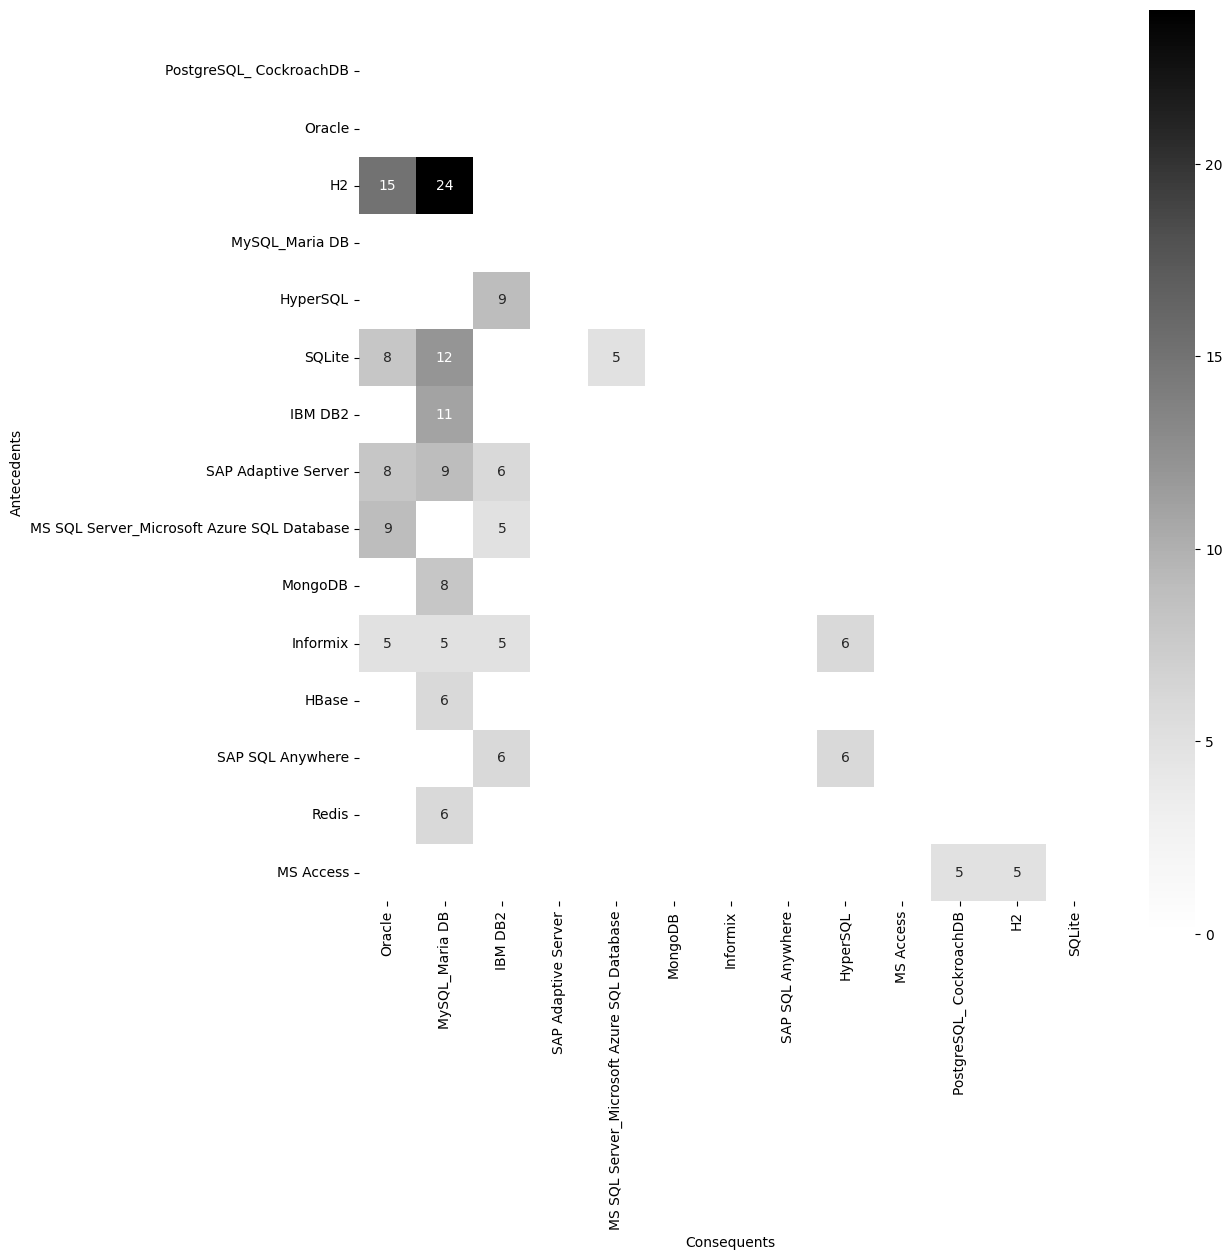

In [24]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), 
    mask=np.triu(np.ones_like(pivot)), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig12.pdf", format="pdf", bbox_inches="tight")


In [70]:
#Test showing the rules without repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [71]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32,0.842105,2.526316,0.099145,4.222222,1.0,1.0
1,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26,0.928571,2.785714,0.085470,9.333333,1.0,1.0
2,H2,MySQL_Maria DB,0.174359,34.348718,0.333333,65.666667,0.123077,24,0.705882,2.117647,0.064957,2.266667,1.0,1.0
3,PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22,0.578947,4.031955,0.084839,2.033974,1.0,1.0
4,H2,PostgreSQL_ CockroachDB,0.174359,34.348718,0.194872,38.389744,0.102564,20,0.588235,3.018576,0.068586,1.955311,1.0,1.0
5,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18,0.276923,2.000000,0.046154,1.191489,1.0,1.0
6,HyperSQL,PostgreSQL_ CockroachDB,0.138462,27.276923,0.194872,38.389744,0.082051,16,0.592593,3.040936,0.055069,1.976224,1.0,1.0
7,H2,Oracle,0.174359,34.348718,0.143590,28.287179,0.076923,15,0.441176,3.072479,0.051887,1.532524,1.0,1.0
8,Oracle,HyperSQL,0.143590,28.287179,0.138462,27.276923,0.071795,14,0.500000,3.611111,0.051913,1.723077,1.0,1.0
10,HyperSQL,H2,0.138462,27.276923,0.174359,34.348718,0.061538,12,0.444444,2.549020,0.037396,1.486154,1.0,1.0


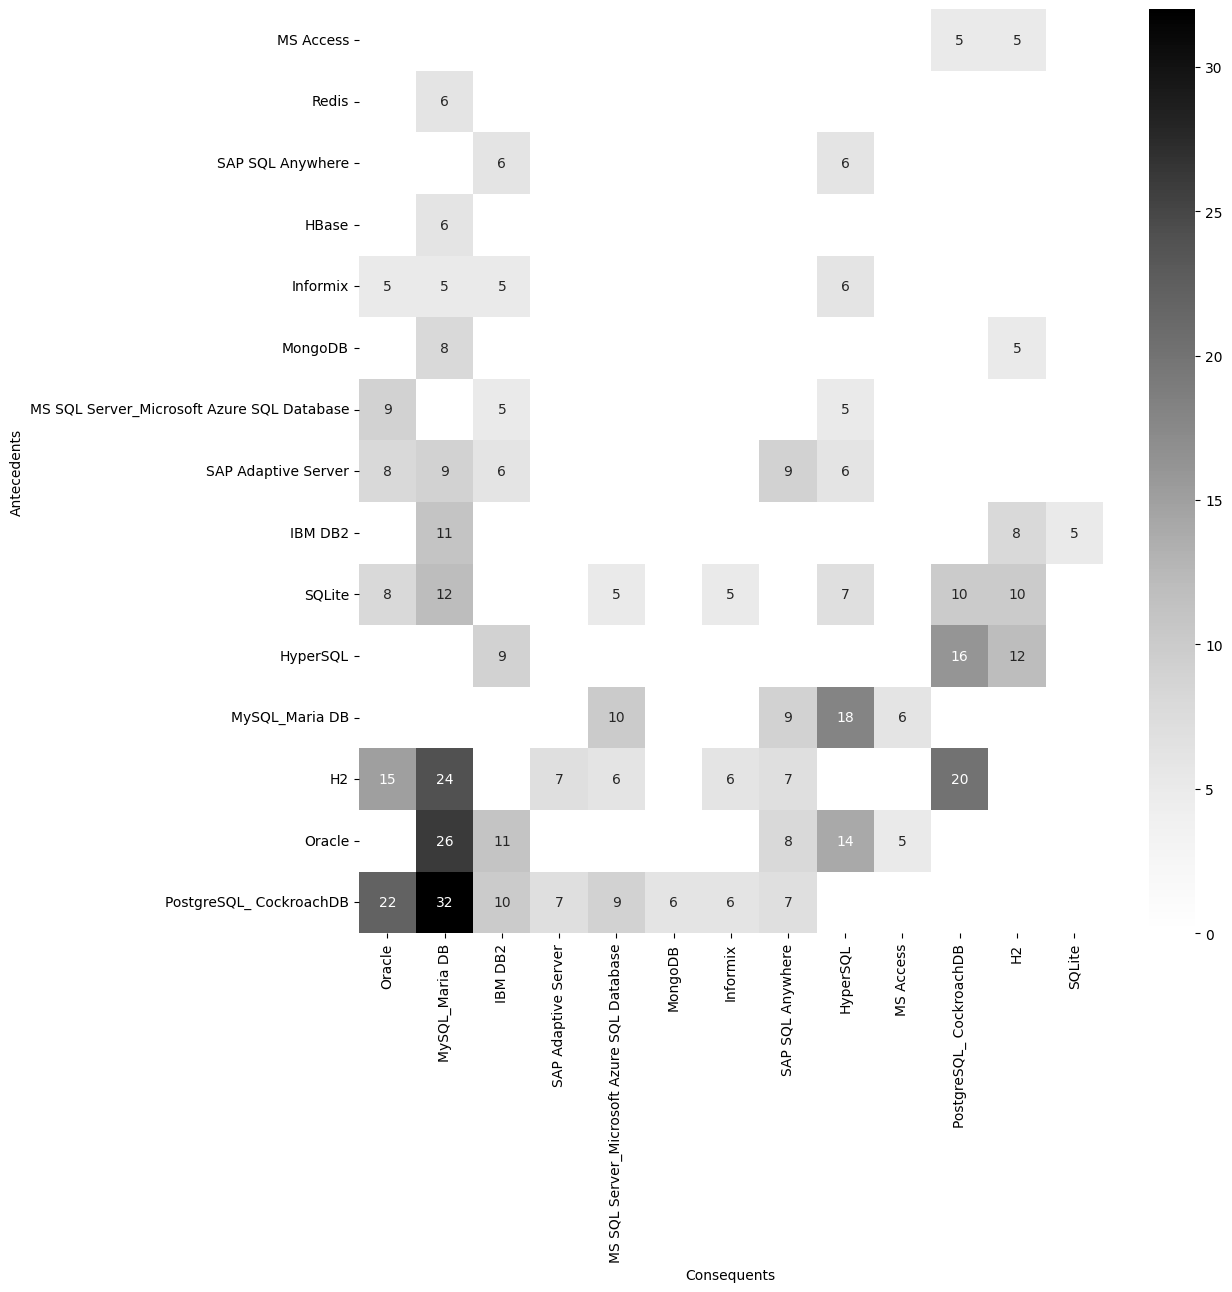

In [72]:
# Heatmap graph generated with all rules and dataframe ordering
# The suggestion for this chart would be to show all rules without filtering by support
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True,  vmin=0,  cmap=sns.color_palette("Greys", as_cmap=True), annot=True, , square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [73]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32,0.842105,2.526316,0.099145,4.222222,1.0,1.0
1,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26,0.928571,2.785714,0.085470,9.333333,1.0,1.0
2,H2,MySQL_Maria DB,0.174359,34.348718,0.333333,65.666667,0.123077,24,0.705882,2.117647,0.064957,2.266667,1.0,1.0
3,PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22,0.578947,4.031955,0.084839,2.033974,1.0,1.0
4,H2,PostgreSQL_ CockroachDB,0.174359,34.348718,0.194872,38.389744,0.102564,20,0.588235,3.018576,0.068586,1.955311,1.0,1.0
5,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18,0.276923,2.000000,0.046154,1.191489,1.0,1.0
6,HyperSQL,PostgreSQL_ CockroachDB,0.138462,27.276923,0.194872,38.389744,0.082051,16,0.592593,3.040936,0.055069,1.976224,1.0,1.0
7,H2,Oracle,0.174359,34.348718,0.143590,28.287179,0.076923,15,0.441176,3.072479,0.051887,1.532524,1.0,1.0
8,Oracle,HyperSQL,0.143590,28.287179,0.138462,27.276923,0.071795,14,0.500000,3.611111,0.051913,1.723077,1.0,1.0
10,HyperSQL,H2,0.138462,27.276923,0.174359,34.348718,0.061538,12,0.444444,2.549020,0.037396,1.486154,1.0,1.0


PostgreSQL and MySQL being used concurrently in 27 projects, Oracle with PostgreSQL appears in 17 projects, H2 with Oracle in 12 projects, SQLite with H2 in 6 projects, Ehcache with MySQL in 10 projects, Sap Adaptive Server with IBM DB2 in 5 projects, MS SQL Server with SQlite in 5 projects, MongoDB with MySQL in 6 projects, among other combinations.

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [74]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
81,SAP Adaptive Server,MySQL_Maria DB,0.046154,9.092308,0.333333,65.666667,0.046154,9.092308,1.000000,3.000000,0.030769,inf,1,1
82,MS Access,MySQL_Maria DB,0.030769,6.061538,0.333333,65.666667,0.030769,6.061538,1.000000,3.000000,0.020513,inf,1,1
83,MS SQL Server_Microsoft Azure SQL Database,MySQL_Maria DB,0.051282,10.102564,0.333333,65.666667,0.051282,10.102564,1.000000,3.000000,0.034188,inf,1,1
84,HBase,MySQL_Maria DB,0.030769,6.061538,0.333333,65.666667,0.030769,6.061538,1.000000,3.000000,0.020513,inf,1,1
85,SAP SQL Anywhere,MySQL_Maria DB,0.046154,9.092308,0.333333,65.666667,0.046154,9.092308,1.000000,3.000000,0.030769,inf,1,1
86,IBM DB2,MySQL_Maria DB,0.056410,11.112821,0.333333,65.666667,0.056410,11.112821,1.000000,3.000000,0.037607,inf,1,1
95,Oracle,MySQL_Maria DB,0.143590,28.287179,0.333333,65.666667,0.133333,26.266667,0.928571,2.785714,0.085470,9.333333,1,1
101,PostgreSQL_ CockroachDB,MySQL_Maria DB,0.194872,38.389744,0.333333,65.666667,0.164103,32.328205,0.842105,2.526316,0.099145,4.222222,1,1
102,Informix,MySQL_Maria DB,0.030769,6.061538,0.333333,65.666667,0.025641,5.051282,0.833333,2.500000,0.015385,4.000000,1,1
104,MongoDB,MySQL_Maria DB,0.056410,11.112821,0.333333,65.666667,0.041026,8.082051,0.727273,2.181818,0.022222,2.444444,1,1


In [75]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
34,Informix,PostgreSQL_ CockroachDB,0.030769,6.061538,0.194872,38.389744,0.030769,6.061538,1.000000,5.131579,0.024773,inf,1,1
35,PostgreSQL_ CockroachDB,Informix,0.194872,38.389744,0.030769,6.061538,0.030769,6.061538,0.157895,5.131579,0.024773,1.150962,1,1
42,IBM DB2,PostgreSQL_ CockroachDB,0.056410,11.112821,0.194872,38.389744,0.051282,10.102564,0.909091,4.665072,0.040289,8.856410,1,1
43,PostgreSQL_ CockroachDB,IBM DB2,0.194872,38.389744,0.056410,11.112821,0.051282,10.102564,0.263158,4.665072,0.040289,1.280586,1,1
44,MS SQL Server_Microsoft Azure SQL Database,PostgreSQL_ CockroachDB,0.051282,10.102564,0.194872,38.389744,0.046154,9.092308,0.900000,4.618421,0.036160,8.051282,1,1
45,PostgreSQL_ CockroachDB,MS SQL Server_Microsoft Azure SQL Database,0.194872,38.389744,0.051282,10.102564,0.046154,9.092308,0.236842,4.618421,0.036160,1.243148,1,1
50,MS Access,PostgreSQL_ CockroachDB,0.030769,6.061538,0.194872,38.389744,0.025641,5.051282,0.833333,4.276316,0.019645,4.830769,1,1
51,PostgreSQL_ CockroachDB,MS Access,0.194872,38.389744,0.030769,6.061538,0.025641,5.051282,0.131579,4.276316,0.019645,1.116084,1,1
54,PostgreSQL_ CockroachDB,Oracle,0.194872,38.389744,0.143590,28.287179,0.112821,22.225641,0.578947,4.031955,0.084839,2.033974,1,1
55,Oracle,PostgreSQL_ CockroachDB,0.143590,28.287179,0.194872,38.389744,0.112821,22.225641,0.785714,4.031955,0.084839,3.757265,1,1


In [76]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
31,Informix,H2,0.030769,6.061538,0.174359,34.348718,0.030769,6.061538,1.000000,5.735294,0.025404,inf,1,1
40,MS Access,H2,0.030769,6.061538,0.174359,34.348718,0.025641,5.051282,0.833333,4.779412,0.020276,4.953846,1,1
48,SAP SQL Anywhere,H2,0.046154,9.092308,0.174359,34.348718,0.035897,7.071795,0.777778,4.460784,0.027850,3.715385,1,1
49,SAP Adaptive Server,H2,0.046154,9.092308,0.174359,34.348718,0.035897,7.071795,0.777778,4.460784,0.027850,3.715385,1,1
52,IBM DB2,H2,0.056410,11.112821,0.174359,34.348718,0.041026,8.082051,0.727273,4.171123,0.031190,3.027350,1,1


In [77]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
15,IBM DB2,Oracle,0.056410,11.112821,0.14359,28.287179,0.056410,11.112821,1.000000,6.964286,0.048310,inf,1,1
16,MS SQL Server_Microsoft Azure SQL Database,Oracle,0.051282,10.102564,0.14359,28.287179,0.046154,9.092308,0.900000,6.267857,0.038790,8.564103,1,1
18,SAP SQL Anywhere,Oracle,0.046154,9.092308,0.14359,28.287179,0.041026,8.082051,0.888889,6.190476,0.034398,7.707692,1,1
20,SAP Adaptive Server,Oracle,0.046154,9.092308,0.14359,28.287179,0.041026,8.082051,0.888889,6.190476,0.034398,7.707692,1,1
24,Informix,Oracle,0.030769,6.061538,0.14359,28.287179,0.025641,5.051282,0.833333,5.803571,0.021223,5.138462,1,1
25,MS Access,Oracle,0.030769,6.061538,0.14359,28.287179,0.025641,5.051282,0.833333,5.803571,0.021223,5.138462,1,1


In [78]:
rules6 = df[ (df['consequents'].str.contains('SQLite'))]# & (df['confidence'] > 0.3) ] # 0.7
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
9,Informix,SQLite,0.030769,6.061538,0.087179,17.174359,0.025641,5.051282,0.833333,9.558824,0.022959,5.476923,1,1
29,MS SQL Server_Microsoft Azure SQL Database,SQLite,0.051282,10.102564,0.087179,17.174359,0.025641,5.051282,0.500000,5.735294,0.021170,1.825641,1,1
33,IBM DB2,SQLite,0.056410,11.112821,0.087179,17.174359,0.025641,5.051282,0.454545,5.213904,0.020723,1.673504,1,1
67,H2,SQLite,0.174359,34.348718,0.087179,17.174359,0.051282,10.102564,0.294118,3.373702,0.036082,1.293162,1,1
69,Oracle,SQLite,0.143590,28.287179,0.087179,17.174359,0.041026,8.082051,0.285714,3.277311,0.028508,1.277949,1,1
77,PostgreSQL_ CockroachDB,SQLite,0.194872,38.389744,0.087179,17.174359,0.051282,10.102564,0.263158,3.018576,0.034293,1.238828,1,1
90,HyperSQL,SQLite,0.138462,27.276923,0.087179,17.174359,0.035897,7.071795,0.259259,2.973856,0.023826,1.232308,1,1
109,MySQL_Maria DB,SQLite,0.333333,65.666667,0.087179,17.174359,0.061538,12.123077,0.184615,2.117647,0.032479,1.119497,1,1


In [79]:
rules7 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [80]:
#rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules8 = df[ (df['consequents'].str.contains('IBM DB2'))] #& (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
3,Informix,IBM DB2,0.030769,6.061538,0.05641,11.112821,0.025641,5.051282,0.833333,14.772727,0.023905,5.661538,1,1
6,SAP Adaptive Server,IBM DB2,0.046154,9.092308,0.05641,11.112821,0.030769,6.061538,0.666667,11.818182,0.028166,2.830769,1,1
7,SAP SQL Anywhere,IBM DB2,0.046154,9.092308,0.05641,11.112821,0.030769,6.061538,0.666667,11.818182,0.028166,2.830769,1,1
10,MS SQL Server_Microsoft Azure SQL Database,IBM DB2,0.051282,10.102564,0.05641,11.112821,0.025641,5.051282,0.500000,8.863636,0.022748,1.887179,1,1
14,Oracle,IBM DB2,0.143590,28.287179,0.05641,11.112821,0.056410,11.112821,0.392857,6.964286,0.048310,1.554148,1,1
23,HyperSQL,IBM DB2,0.138462,27.276923,0.05641,11.112821,0.046154,9.092308,0.333333,5.909091,0.038343,1.415385,1,1
32,SQLite,IBM DB2,0.087179,17.174359,0.05641,11.112821,0.025641,5.051282,0.294118,5.213904,0.020723,1.336752,1,1
43,PostgreSQL_ CockroachDB,IBM DB2,0.194872,38.389744,0.05641,11.112821,0.051282,10.102564,0.263158,4.665072,0.040289,1.280586,1,1
53,H2,IBM DB2,0.174359,34.348718,0.05641,11.112821,0.041026,8.082051,0.235294,4.171123,0.031190,1.233925,1,1
89,MySQL_Maria DB,IBM DB2,0.333333,65.666667,0.05641,11.112821,0.056410,11.112821,0.169231,3.000000,0.037607,1.135802,1,1


In [81]:
#rules9 = df[(df['consequents'].str.contains('MongoDB'))]#& (df['confidence'] > 0.3) ] # 0.7
rules9 = df[ (df['consequents'].str.contains('MS SQL Server'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
11,IBM DB2,MS SQL Server_Microsoft Azure SQL Database,0.056410,11.112821,0.051282,10.102564,0.025641,5.051282,0.454545,8.863636,0.022748,1.739316,1,1
17,Oracle,MS SQL Server_Microsoft Azure SQL Database,0.143590,28.287179,0.051282,10.102564,0.046154,9.092308,0.321429,6.267857,0.038790,1.398111,1,1
28,SQLite,MS SQL Server_Microsoft Azure SQL Database,0.087179,17.174359,0.051282,10.102564,0.025641,5.051282,0.294118,5.735294,0.021170,1.344017,1,1
45,PostgreSQL_ CockroachDB,MS SQL Server_Microsoft Azure SQL Database,0.194872,38.389744,0.051282,10.102564,0.046154,9.092308,0.236842,4.618421,0.036160,1.243148,1,1
61,HyperSQL,MS SQL Server_Microsoft Azure SQL Database,0.138462,27.276923,0.051282,10.102564,0.025641,5.051282,0.185185,3.611111,0.018540,1.164336,1,1
65,H2,MS SQL Server_Microsoft Azure SQL Database,0.174359,34.348718,0.051282,10.102564,0.030769,6.061538,0.176471,3.441176,0.021828,1.152015,1,1
78,MySQL_Maria DB,MS SQL Server_Microsoft Azure SQL Database,0.333333,65.666667,0.051282,10.102564,0.051282,10.102564,0.153846,3.000000,0.034188,1.121212,1,1


In [82]:
rules10 = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
6,SAP Adaptive Server,IBM DB2,0.046154,9.092308,0.056410,11.112821,0.030769,6.061538,0.666667,11.818182,0.028166,2.830769,1,1
19,Oracle,SAP Adaptive Server,0.143590,28.287179,0.046154,9.092308,0.041026,8.082051,0.285714,6.190476,0.034398,1.335385,1,1
20,SAP Adaptive Server,Oracle,0.046154,9.092308,0.143590,28.287179,0.041026,8.082051,0.888889,6.190476,0.034398,7.707692,1,1
38,HyperSQL,SAP Adaptive Server,0.138462,27.276923,0.046154,9.092308,0.030769,6.061538,0.222222,4.814815,0.024379,1.226374,1,1
39,SAP Adaptive Server,HyperSQL,0.046154,9.092308,0.138462,27.276923,0.030769,6.061538,0.666667,4.814815,0.024379,2.584615,1,1
46,H2,SAP Adaptive Server,0.174359,34.348718,0.046154,9.092308,0.035897,7.071795,0.205882,4.460784,0.027850,1.201140,1,1
49,SAP Adaptive Server,H2,0.046154,9.092308,0.174359,34.348718,0.035897,7.071795,0.777778,4.460784,0.027850,3.715385,1,1


In [83]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MS Access'))]# & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
27,Oracle,MS Access,0.143590,28.287179,0.030769,6.061538,0.025641,5.051282,0.178571,5.803571,0.021223,1.179933,1,1
41,H2,MS Access,0.174359,34.348718,0.030769,6.061538,0.025641,5.051282,0.147059,4.779412,0.020276,1.136340,1,1
51,PostgreSQL_ CockroachDB,MS Access,0.194872,38.389744,0.030769,6.061538,0.025641,5.051282,0.131579,4.276316,0.019645,1.116084,1,1
79,MySQL_Maria DB,MS Access,0.333333,65.666667,0.030769,6.061538,0.030769,6.061538,0.092308,3.000000,0.020513,1.067797,1,1


In [84]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules12 = df[ (df['consequents'] .str.contains('MongoDB'))]# & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
93,PostgreSQL_ CockroachDB,MongoDB,0.194872,38.389744,0.05641,11.112821,0.030769,6.061538,0.157895,2.799043,0.019776,1.120513,1,1
97,H2,MongoDB,0.174359,34.348718,0.05641,11.112821,0.025641,5.051282,0.147059,2.606952,0.015805,1.106278,1,1
105,MySQL_Maria DB,MongoDB,0.333333,65.666667,0.05641,11.112821,0.041026,8.082051,0.123077,2.181818,0.022222,1.076023,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.
In first version not occurr expected patterns

In [85]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [86]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules10 = df2[(df2['consequents'].str.contains('PostGIS'))] Este BD nã retornou nas regras
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [87]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [88]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [89]:
rules13 = df2[(df2['lift'] > 4.5)] #>20
rules13 = rules13.sort_values(['lift'], ascending=False)
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
2,IBM DB2,Informix,0.056410,11.112821,0.030769,6.061538,0.025641,5.051282,0.454545,14.772727,0.023905,1.776923,1,1
3,Informix,IBM DB2,0.030769,6.061538,0.056410,11.112821,0.025641,5.051282,0.833333,14.772727,0.023905,5.661538,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
5,IBM DB2,SAP SQL Anywhere,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
6,SAP Adaptive Server,IBM DB2,0.046154,9.092308,0.056410,11.112821,0.030769,6.061538,0.666667,11.818182,0.028166,2.830769,1,1
7,SAP SQL Anywhere,IBM DB2,0.046154,9.092308,0.056410,11.112821,0.030769,6.061538,0.666667,11.818182,0.028166,2.830769,1,1
8,SQLite,Informix,0.087179,17.174359,0.030769,6.061538,0.025641,5.051282,0.294118,9.558824,0.022959,1.373077,1,1
9,Informix,SQLite,0.030769,6.061538,0.087179,17.174359,0.025641,5.051282,0.833333,9.558824,0.022959,5.476923,1,1


In [90]:
#rules13_filter = rules13.to_excel('rules_filters_liftv1.xlsx', index=False)

In [91]:
rules14 = df2[(df2['confidence'] > 0.1)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,SAP Adaptive Server,SAP SQL Anywhere,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
1,SAP SQL Anywhere,SAP Adaptive Server,0.046154,9.092308,0.046154,9.092308,0.046154,9.092308,1.000000,21.666667,0.044024,inf,1,1
2,IBM DB2,Informix,0.056410,11.112821,0.030769,6.061538,0.025641,5.051282,0.454545,14.772727,0.023905,1.776923,1,1
3,Informix,IBM DB2,0.030769,6.061538,0.056410,11.112821,0.025641,5.051282,0.833333,14.772727,0.023905,5.661538,1,1
4,IBM DB2,SAP Adaptive Server,0.056410,11.112821,0.046154,9.092308,0.030769,6.061538,0.545455,11.818182,0.028166,2.098462,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,MySQL_Maria DB,H2,0.333333,65.666667,0.174359,34.348718,0.123077,24.246154,0.369231,2.117647,0.064957,1.308943,1,1
109,MySQL_Maria DB,SQLite,0.333333,65.666667,0.087179,17.174359,0.061538,12.123077,0.184615,2.117647,0.032479,1.119497,1,1
110,MySQL_Maria DB,HyperSQL,0.333333,65.666667,0.138462,27.276923,0.092308,18.184615,0.276923,2.000000,0.046154,1.191489,1,1
111,HyperSQL,MySQL_Maria DB,0.138462,27.276923,0.333333,65.666667,0.092308,18.184615,0.666667,2.000000,0.046154,2.000000,1,1


In [93]:
#if you need to generate the rules in excel
rules_filter = df2.to_excel('historical_filters.xlsx', index=False)